In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
df = pd.read_csv("dataset_fd_Sp_no-Mos.csv")

In [236]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0])).reset_index().set_index("region")

In [237]:
agg_df = agg_df.groupby("federal_district").agg({"infections":"sum", "unemployed":"sum", "population":"mean", "federal_district":lambda x: x.iloc[0]})

In [238]:
agg_df["procent_unemployed"] = agg_df.unemployed / agg_df.population

In [239]:
agg_df["procent_infected"] = agg_df.infections / agg_df.population

In [240]:
agg_df

,infections,unemployed,population,federal_district,procent_unemployed,procent_infected
federal_district,,,,,,
ДФО,97589.0,248153,8.118915e+05,ДФО,0.305648,0.120200
ПФО,204153.0,823752,2.091977e+06,ПФО,0.393767,0.097589
СЗФО,194088.0,359956,1.393788e+06,СЗФО,0.258257,0.139252
СКФО,70617.0,743087,1.418705e+06,СКФО,0.523778,0.049776
СФО,150880.0,540556,1.711839e+06,СФО,0.315775,0.088139
УФО,116630.0,400474,2.060125e+06,УФО,0.194393,0.056613
ЦФО,266823.0,640022,1.573852e+06,ЦФО,0.406660,0.169535
ЮФО,101956.0,590845,2.058260e+06,ЮФО,0.287060,0.049535


In [241]:
agg_df.drop("federal_district", axis=1, inplace=True)
one = agg_df[["procent_infected"]].reset_index().rename({"procent_infected":"value"}, axis=1)
two = agg_df[["procent_unemployed"]].reset_index().rename({"procent_unemployed":"value"}, axis=1)

In [242]:
one["kind"] = "Процент выявленных случаев заболевания"
two["kind"] = "Процент поданных заявок на пособие по безработице"

In [243]:
tmp = one.append(two)

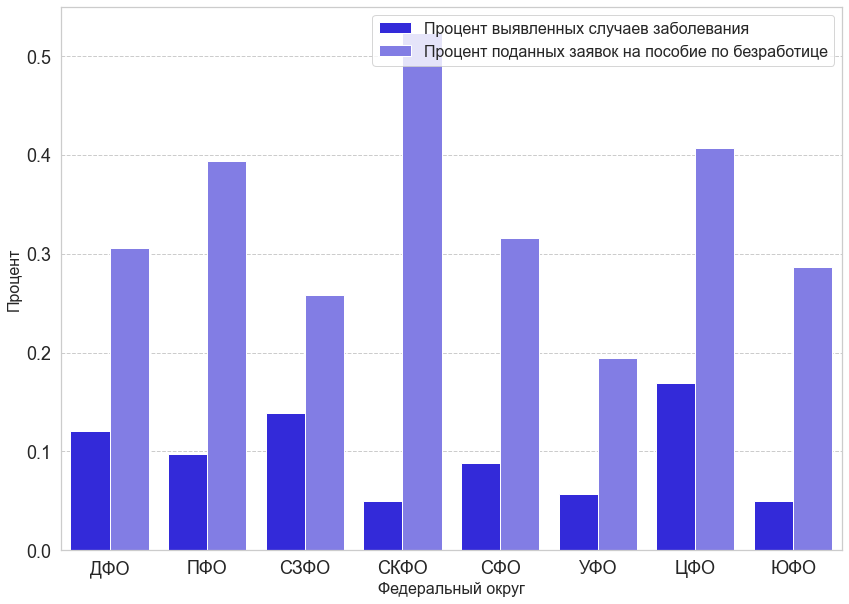

In [244]:
color1 = "#190DF6"
color2 = "#736cf5"

# Создайте градиент от color1 к color2
custom_palette = sns.color_palette([color1, color2], as_cmap=True)

# Используйте вашу палитру в barplot

plt.figure(figsize=(14, 10))
sns.set(rc={'font.size': 12, 'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid", {'grid.color': '.8', 'grid.linestyle': '--'})
sns.set_palette(custom_palette)
ax = sns.barplot(data=tmp, x="federal_district", y="value", hue="kind",  )

ax.set_xlabel('Федеральный округ', fontsize=16)  # Set font size for x-axis label
ax.set_ylabel('Процент', fontsize=16)  # Set font size for y-axis label

ax.legend(fontsize='16', title_fontsize='14')

ax.tick_params(axis='both', labelsize=18)   # Set font size for tick labels

In [245]:
df = pd.read_csv("dataset_fd_Sp_no-Mos.csv")

In [246]:
df_region_metric = pd.read_csv("merged_with_ria19-21.csv", index_col=0)

In [247]:
df_region_metric

,region,sum_infections,population,sum_healed,sum_deathed,sum_unemployed,procent_healed,procent_infected,procent_death,procent_unemployed,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,Адыгея,5828.0,463088.0,4557.0,49.0,598.597528,0.781915,0.012585,0.000106,0.001293,53.155182,1.896389,25.023275,3.822605,34.959291,26.8420,54.132260,1.836252,64.281350,1.948185
1,Алтай,7296.0,220181.0,6207.0,24.0,526.733598,0.850740,0.033136,0.000109,0.002392,43.871593,2.178380,36.256563,4.301187,9.430103,26.5495,46.457233,2.267008,53.269006,2.381802
2,Амурская,7313.0,790044.0,6864.0,65.0,835.681412,0.938602,0.009256,0.000082,0.001058,128.246053,4.061075,38.056268,5.810821,44.579305,35.8990,136.036727,4.147556,161.811917,4.304167
3,Архангельская,21299.0,1092424.0,13985.0,262.0,717.824677,0.656604,0.019497,0.000240,0.000657,160.991995,4.798038,30.937707,7.329229,49.566421,33.9440,165.969440,4.990174,191.145528,5.261514
4,Астраханская,9527.0,1005782.0,7323.0,173.0,1556.432574,0.768657,0.009472,0.000172,0.001547,88.434173,3.688483,24.910160,8.758001,34.508841,32.9120,92.234699,3.712293,103.549086,3.985838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Хакасия,7700.0,534262.0,6276.0,83.0,540.352906,0.815065,0.014412,0.000155,0.001011,78.938092,3.663943,36.709842,9.724979,30.409276,20.0430,84.013087,3.704567,98.685051,3.929953
73,Челябинская,18836.0,3466369.0,14198.0,186.0,3244.037665,0.753769,0.005434,0.000054,0.000936,129.083971,5.236092,29.293511,10.798281,48.190734,51.9970,134.758013,5.352160,153.382266,5.526691
74,Чечня,3408.0,1478726.0,1948.0,46.0,6871.725879,0.571596,0.002305,0.000031,0.004647,8.542497,0.363339,22.560315,3.101398,10.816720,27.8550,9.429063,0.389558,13.820501,0.543782
75,Чувашия,9447.0,1217818.0,7616.0,190.0,1310.354774,0.806182,0.007757,0.000156,0.001076,109.591751,5.780236,31.884714,9.118099,32.787488,31.9370,114.768381,5.740644,138.754424,6.155783


In [248]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,infections,deaths,healed,tests,Rt,level,yandex_continuous,yandex_level,pass,federal_district
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,42.0,0.0,44.0,NaN,0.873684,NaN,3.314286,2.0,0.0,ЮФО
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74627,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
74628,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
74629,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО
74630,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,770.0,6.0,566.0,NaN,1.111111,3.0,NaN,NaN,NaN,ЦФО


In [249]:
df_region_metric = df_region_metric.set_index("region")

In [250]:
df = pd.merge(df, df_region_metric.drop(["population"], axis=1), left_on="region", right_index=True)

In [251]:
df_region_metric

,sum_infections,population,sum_healed,sum_deathed,sum_unemployed,procent_healed,procent_infected,procent_death,procent_unemployed,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
region,,,,,,,,,,,,,,,,,,,
Адыгея,5828.0,463088.0,4557.0,49.0,598.597528,0.781915,0.012585,0.000106,0.001293,53.155182,1.896389,25.023275,3.822605,34.959291,26.8420,54.132260,1.836252,64.281350,1.948185
Алтай,7296.0,220181.0,6207.0,24.0,526.733598,0.850740,0.033136,0.000109,0.002392,43.871593,2.178380,36.256563,4.301187,9.430103,26.5495,46.457233,2.267008,53.269006,2.381802
Амурская,7313.0,790044.0,6864.0,65.0,835.681412,0.938602,0.009256,0.000082,0.001058,128.246053,4.061075,38.056268,5.810821,44.579305,35.8990,136.036727,4.147556,161.811917,4.304167
Архангельская,21299.0,1092424.0,13985.0,262.0,717.824677,0.656604,0.019497,0.000240,0.000657,160.991995,4.798038,30.937707,7.329229,49.566421,33.9440,165.969440,4.990174,191.145528,5.261514
Астраханская,9527.0,1005782.0,7323.0,173.0,1556.432574,0.768657,0.009472,0.000172,0.001547,88.434173,3.688483,24.910160,8.758001,34.508841,32.9120,92.234699,3.712293,103.549086,3.985838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Хакасия,7700.0,534262.0,6276.0,83.0,540.352906,0.815065,0.014412,0.000155,0.001011,78.938092,3.663943,36.709842,9.724979,30.409276,20.0430,84.013087,3.704567,98.685051,3.929953
Челябинская,18836.0,3466369.0,14198.0,186.0,3244.037665,0.753769,0.005434,0.000054,0.000936,129.083971,5.236092,29.293511,10.798281,48.190734,51.9970,134.758013,5.352160,153.382266,5.526691
Чечня,3408.0,1478726.0,1948.0,46.0,6871.725879,0.571596,0.002305,0.000031,0.004647,8.542497,0.363339,22.560315,3.101398,10.816720,27.8550,9.429063,0.389558,13.820501,0.543782


In [252]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74627,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74628,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74629,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74630,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075


### Гипотеза
Количество заявок на пособие по безработице взаимосвязано с эпидемиологический обстановкой в регионе в период пандемии COVID19

In [253]:
df.head()

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.13226,1.836252,64.28135,1.948185


## проверим наличие зависимостей на уровне регион-неделя

In [256]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0])).reset_index()

In [257]:
# отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
agg_df["infections"] = agg_df["infections"] / agg_df["population"]
agg_df["unemployed"] = agg_df["unemployed"] / agg_df["population"]

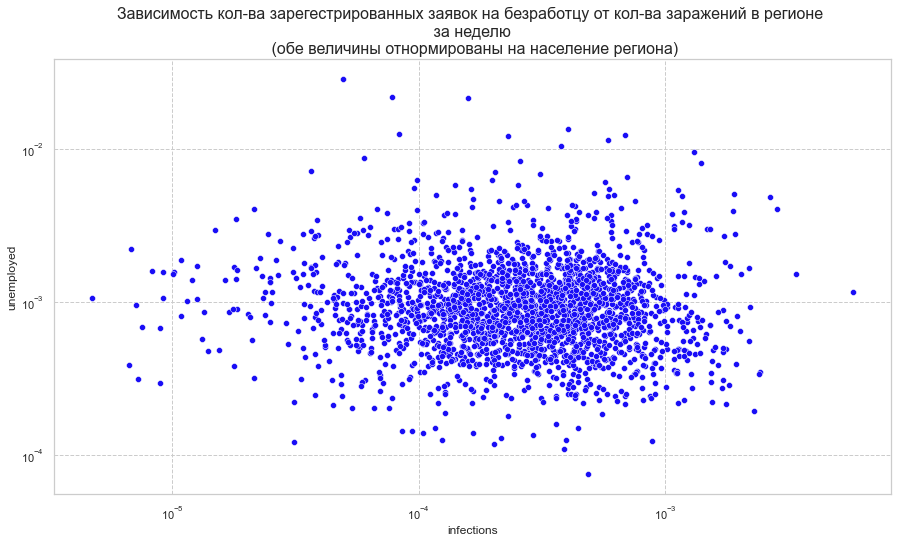

In [262]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data = agg_df, x="infections", y="unemployed", color=color1)
plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n за неделю \n (обе величины отнормированы на население региона)",
          fontsize=16
          )
None

посчитаем корелляцию кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе за неделю

In [260]:
np.corrcoef(agg_df[["infections", "unemployed"]].transpose())

array([[1.00000000e+00, 5.55818719e-04],
       [5.55818719e-04, 1.00000000e+00]])

Ярко выраженной зависимости ожидаемо нет, так как согласно механизму заболеваемость *отложенно* влияет на экономику региона

## проверим наличие зависимостей на уровне различных регионов
Оценим суммарное кол-во зарегестрированных случаев
?Будем считать что оно высоко коррелирует с реальной эпидемиологической обстановкой
Посчитаем на суммарное кол-ве поданных заявок на пособие по безработице
Посмотрим на корелляцию данных величин

In [127]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0]))

In [128]:
agg_df = agg_df.groupby("region").agg(sum_infections=("infections", "sum"),
                             sum_unemployed=("unemployed", "sum"),
                             population=("population", "mean"),
                             federal_district=("federal_district", lambda x: x.iloc[0]))


In [129]:
# отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
agg_df["sum_infections"] = agg_df["sum_infections"] / agg_df["population"]
agg_df["sum_unemployed"] = agg_df["sum_unemployed"] / agg_df["population"]

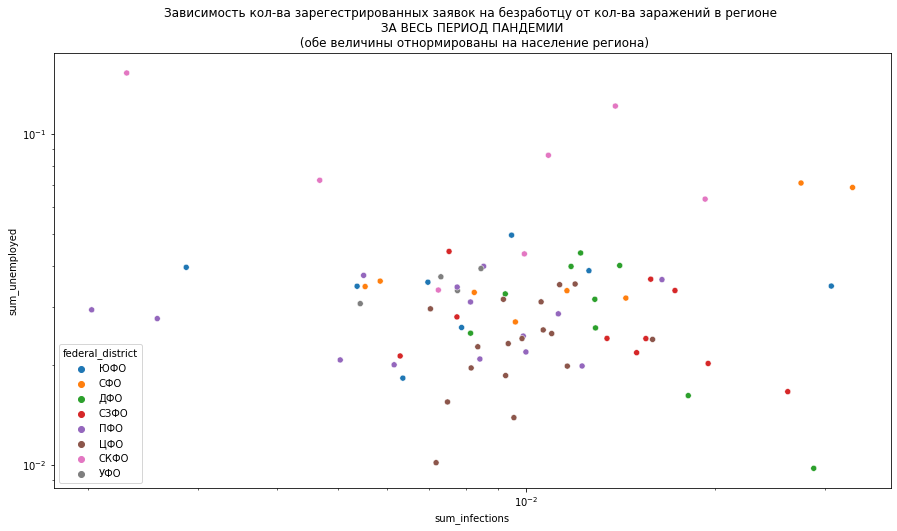

In [130]:
plt.figure(figsize=(15, 8))
plt.yscale("log")
plt.xscale("log")
sns.scatterplot(data = agg_df, x="sum_infections", y="sum_unemployed", hue="federal_district")
plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА ВЕСЬ ПЕРИОД ПАНДЕМИИ \n (обе величины отнормированы на население региона)")
None

In [131]:
np.corrcoef(agg_df[["sum_infections", "sum_unemployed"]].transpose())

array([[1.        , 0.01920574],
       [0.01920574, 1.        ]])

Значимого уровня корреляции между исследуемыми показателями не найдено

## регрессионный анализ
Чтобы проверить наличие взаимосвязи между количеством заявок на пособие по безработице и регистрируемым количеством заболеваний воспользуемся оценкой модели со случайными эффектами

предпосылки к использованию модели со случаынйми эффектами - ?
какие тесты надо дополнительно провести?

In [132]:
# !pip install linearmodels

In [133]:
from linearmodels.panel import PanelOLS, RandomEffects

In [134]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
0,2020-04-06,Адыгея,Производство и строительство,19,18,0,3,12,19,19,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
1,2020-04-06,Адыгея,Производство и строительство,2,1,0,0,1,1,2,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
2,2020-04-06,Адыгея,"Финансы, страхование и юриспруденция",13,6,0,2,11,13,13,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
3,2020-04-06,Адыгея,Производство и строительство,9,2,1,2,6,9,9,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
4,2020-04-06,Адыгея,Административная и управленческая деятельность,17,8,0,3,14,17,17,...,53.155182,1.896389,25.023275,3.822605,34.959291,26.842,54.132260,1.836252,64.281350,1.948185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74627,2020-10-26,Ярославская,Услуги,2,0,1,2,2,2,2,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74628,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74629,2020-10-26,Ярославская,Энергетика,1,1,0,0,1,1,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075
74630,2020-10-26,Ярославская,Производство и строительство,1,1,0,0,0,0,1,...,169.202897,6.127628,23.509231,12.846150,51.636007,39.469,175.948568,6.201432,202.709952,6.415075


In [135]:
df.columns.tolist()[-10:]

['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

In [136]:
df.yandex_continuous.isna().sum()

23143

In [137]:
df.shape

(70132, 41)

In [138]:
# инпутация данных

In [139]:
from sklearn.impute import KNNImputer

In [140]:
knn_imputer = KNNImputer(n_neighbors=2)

In [157]:
df_imputed = knn_imputer.fit_transform(df[[i for i in df.columns if i not in ["week", "region", "oced", "federal_district" ,"tests", "Rt", "level", "yandex_level", "pass"]]])

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70132 entries, 0 to 74631
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week                70132 non-null  object 
 1   region              70132 non-null  object 
 2   oced                70132 non-null  object 
 3   unemployed          70132 non-null  int64  
 4   cv_gender           70132 non-null  int64  
 5   cv_birthday_2000    70132 non-null  int64  
 6   cv_birthday_1990    70132 non-null  int64  
 7   cv_birthday_1980    70132 non-null  int64  
 8   cv_birthday_1970    70132 non-null  int64  
 9   cv_birthday_1960    70132 non-null  int64  
 10  population          70132 non-null  float64
 11  men                 70132 non-null  float64
 12  women               70132 non-null  float64
 13  infections          70132 non-null  float64
 14  deaths              70132 non-null  float64
 15  healed              70132 non-null  float64
 16  test

In [159]:
70132 - 46989

23143

In [101]:
df["yandex_continuous"] = df.yandex_continuous.fillna(df.yandex_continuous.mean())

In [102]:
# from sklearn.preprocessing import OneHotEncoder
#
# encoder = OneHotEncoder()
# encoded = encoder.fit_transform(df.federal_district.values.reshape(-1, 1)).toarray()
# df = pd.merge(df, pd.DataFrame(encoded, columns=encoder.get_feature_names_out()).set_index(df.index), left_index=True, right_index=True)

In [103]:
import random

name_extra_features = ['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

dict_extra_features = {i: (i, "mean") for i in name_extra_features}

df_panel = df.copy()
df_panel["week"] = pd.to_datetime(df_panel["week"])
df_panel["random"] = [random.randint(0, 100) for i in range(len(df_panel))]
df_panel = df_panel.groupby(["federal_district", "week"]).agg(sum_infections=("infections", "mean"),
                                                    sum_unemployed=("unemployed", "sum"),
                                                    # sum_deaths=("deaths", "mean"),
                                                    # rnd_var=("random", "mean"),
                                                    population=("population", "mean"),
                                                    yandex_metric=("yandex_continuous", "mean"),
                                                    rt_coef=("Rt", "mean"),
                                                    # depo_mean_19=("depo_mean_19", "mean"),
                                                              **dict_extra_features
                                                    # dfo=("x0_ДФО", "mean"),
                                                    # pfo=("x0_ПФО", "mean"),
                                                    # szfo=("x0_СЗФО", "mean"),
                                                    # skfo=("x0_СКФО", "mean"),
                                                    # sfo=("x0_СФО", "mean"),
                                                    # cfo=("x0_ЦФО", "mean"),
                                                    # ufo=("x0_УФО", "mean"),
                                                    )

In [104]:
df_panel["sum_infections"] /= df_panel["population"]
df_panel["sum_unemployed"] /= df_panel["population"]
df_panel = df_panel.reset_index()

In [105]:
df_panel["sum_infections"] = df_panel["sum_infections"].shift(2)

In [106]:
df_panel = df_panel.dropna()

In [107]:
df_panel

,federal_district,week,sum_infections,sum_unemployed,population,yandex_metric,rt_coef,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
2,ДФО,2020-04-20,0.000077,0.017993,9.134329e+05,2.056513,2.912596,149.218522,3.957859,32.423787,7.980272,44.441576,31.744989,156.646115,4.021767,181.174093,4.289578
3,ДФО,2020-04-27,0.000606,0.011442,9.626439e+05,2.037162,1.227306,145.518890,3.919309,32.580115,8.126645,43.677898,32.502877,152.768760,3.986659,176.684370,4.258315
4,ДФО,2020-05-04,0.000062,0.007045,9.484666e+05,2.035755,1.214661,143.054980,3.896417,32.588800,8.001910,43.084377,32.091874,150.281331,3.964747,173.985128,4.235279
5,ДФО,2020-05-11,0.000112,0.013985,9.460702e+05,1.940160,1.074421,147.728684,3.943186,32.583128,8.098598,44.231586,32.306186,155.085920,4.009540,179.351023,4.278737
6,ДФО,2020-05-18,0.000056,0.014467,9.378513e+05,1.853747,1.154891,148.185565,3.953788,32.609207,8.102315,44.132027,32.063965,155.531695,4.018593,179.825466,4.286710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,ЮФО,2020-09-28,0.000334,0.005152,2.282553e+06,1.412971,1.037999,89.063009,3.368575,37.269124,8.156177,33.971963,39.359904,94.497938,3.419183,107.267600,3.563544
236,ЮФО,2020-10-05,0.000246,0.004709,2.293120e+06,1.893202,1.281269,89.536477,3.397073,37.868160,8.225178,33.784068,39.434650,95.195930,3.457017,107.815015,3.599403
237,ЮФО,2020-10-12,0.000260,0.004455,2.277879e+06,1.893202,1.038651,89.257004,3.357757,37.418162,8.117732,34.318406,39.541619,94.760889,3.411854,107.381887,3.550525
238,ЮФО,2020-10-19,0.000102,0.004154,2.301150e+06,1.893202,1.102579,89.446340,3.400879,37.544164,8.212994,33.853094,39.525191,94.945216,3.453102,107.756580,3.599775


In [108]:
df_panel.to_csv("dataset_agregared.csv")

In [109]:
df_panel

,federal_district,week,sum_infections,sum_unemployed,population,yandex_metric,rt_coef,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
2,ДФО,2020-04-20,0.000077,0.017993,9.134329e+05,2.056513,2.912596,149.218522,3.957859,32.423787,7.980272,44.441576,31.744989,156.646115,4.021767,181.174093,4.289578
3,ДФО,2020-04-27,0.000606,0.011442,9.626439e+05,2.037162,1.227306,145.518890,3.919309,32.580115,8.126645,43.677898,32.502877,152.768760,3.986659,176.684370,4.258315
4,ДФО,2020-05-04,0.000062,0.007045,9.484666e+05,2.035755,1.214661,143.054980,3.896417,32.588800,8.001910,43.084377,32.091874,150.281331,3.964747,173.985128,4.235279
5,ДФО,2020-05-11,0.000112,0.013985,9.460702e+05,1.940160,1.074421,147.728684,3.943186,32.583128,8.098598,44.231586,32.306186,155.085920,4.009540,179.351023,4.278737
6,ДФО,2020-05-18,0.000056,0.014467,9.378513e+05,1.853747,1.154891,148.185565,3.953788,32.609207,8.102315,44.132027,32.063965,155.531695,4.018593,179.825466,4.286710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,ЮФО,2020-09-28,0.000334,0.005152,2.282553e+06,1.412971,1.037999,89.063009,3.368575,37.269124,8.156177,33.971963,39.359904,94.497938,3.419183,107.267600,3.563544
236,ЮФО,2020-10-05,0.000246,0.004709,2.293120e+06,1.893202,1.281269,89.536477,3.397073,37.868160,8.225178,33.784068,39.434650,95.195930,3.457017,107.815015,3.599403
237,ЮФО,2020-10-12,0.000260,0.004455,2.277879e+06,1.893202,1.038651,89.257004,3.357757,37.418162,8.117732,34.318406,39.541619,94.760889,3.411854,107.381887,3.550525
238,ЮФО,2020-10-19,0.000102,0.004154,2.301150e+06,1.893202,1.102579,89.446340,3.400879,37.544164,8.212994,33.853094,39.525191,94.945216,3.453102,107.756580,3.599775


### проверим коллениарность данных

<AxesSubplot:>

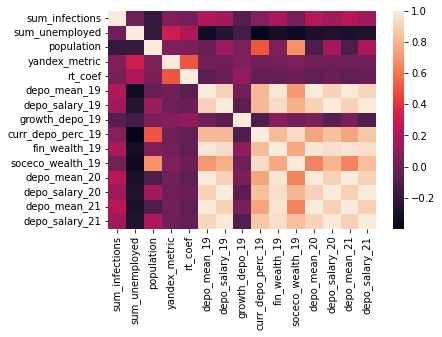

In [110]:
sns.heatmap(df_panel.corr())

In [111]:
df_panel.corr()

,sum_infections,sum_unemployed,population,yandex_metric,rt_coef,depo_mean_19,depo_salary_19,growth_depo_19,curr_depo_perc_19,fin_wealth_19,soceco_wealth_19,depo_mean_20,depo_salary_20,depo_mean_21,depo_salary_21
sum_infections,1.000000,-0.009347,-0.205382,0.057061,0.031129,0.216249,0.162368,-0.083241,0.073606,0.189051,0.020232,0.233159,0.157863,0.236778,0.158252
sum_unemployed,-0.009347,1.000000,-0.198828,0.306755,0.212705,-0.334357,-0.266310,-0.150835,-0.398805,-0.317839,-0.344147,-0.304745,-0.279782,-0.304504,-0.286207
population,-0.205382,-0.198828,1.000000,0.043969,0.038672,-0.019243,0.146088,0.045790,0.505326,0.053223,0.680974,-0.112635,0.170802,-0.110840,0.198425
yandex_metric,0.057061,0.306755,0.043969,1.000000,0.507172,0.005526,-0.005060,0.065459,0.008511,0.011699,0.044778,0.004078,-0.003413,0.007672,0.000599
rt_coef,0.031129,0.212705,0.038672,0.507172,1.000000,-0.066285,-0.020496,0.114257,-0.048416,-0.047512,-0.016102,-0.057383,-0.021215,-0.059508,-0.029269
depo_mean_19,0.216249,-0.334357,-0.019243,0.005526,-0.066285,1.000000,0.900260,0.002368,0.817932,0.978815,0.710145,0.990043,0.907819,0.990492,0.918642
depo_salary_19,0.162368,-0.266310,0.146088,-0.005060,-0.020496,0.900260,1.000000,-0.062416,0.818515,0.944955,0.788809,0.904616,0.999024,0.898103,0.993568
growth_depo_19,-0.083241,-0.150835,0.045790,0.065459,0.114257,0.002368,-0.062416,1.000000,-0.110885,0.089955,0.007297,0.043603,-0.064412,0.030139,-0.099910
curr_depo_perc_19,0.073606,-0.398805,0.505326,0.008511,-0.048416,0.817932,0.818515,-0.110885,1.000000,0.820831,0.941926,0.744512,0.841725,0.745180,0.868238
fin_wealth_19,0.189051,-0.317839,0.053223,0.011699,-0.047512,0.978815,0.944955,0.089955,0.820831,1.000000,0.760220,0.976982,0.948725,0.972295,0.949732


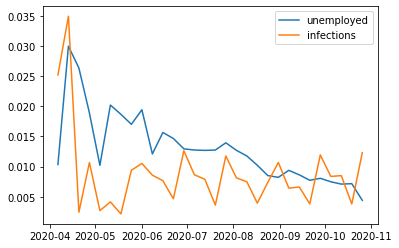

In [112]:

tmp = df_panel[df_panel.federal_district == "ПФО"]
plt.plot(tmp.week, tmp.sum_unemployed, label="unemployed")
plt.plot(tmp.week, tmp.sum_infections*34, label="infections")
plt.legend()
None

### проверить Коэффициенты Вариации (VIF)

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X - матрица признаков
vif_data = pd.DataFrame()
vif_data["Variable"] = df_panel.columns
vif_data["VIF"] = [variance_inflation_factor(df_panel.values, i) for i in range(df_panel.shape[1])]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
vif_data

In [ ]:
df_panel

In [55]:
tmp= df_panel.reset_index()
tmp['week'] = pd.Categorical(tmp['week'])
tmp['region'] = pd.Categorical(tmp['federal_district'])

In [56]:
columns_for_x = ['sum_infections', "yandex_metric", "rt_coef"] + name_extra_features
name_y = "sum_unemployed"

formula = f'{name_y} ~ ' + ' + '.join(columns_for_x) + ' + C(federal_district) + C(week)'

In [57]:
import statsmodels.api as sm

model = sm.OLS.from_formula(formula, data=tmp)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [59]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         sum_unemployed   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     4.816
Date:                Tue, 12 Dec 2023   Prob (F-statistic):            0.00913
Time:                        18:20:16   Log-Likelihood:                 4348.7
No. Observations:                 238   AIC:                            -8597.
Df Residuals:                     188   BIC:                            -8424.
Df Model:                          49                                         
Covariance Type:                  HAC                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

c:\users\никита\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 49, but rank is 2
  warnings.warn('covariance of constraints does not have full '


In [114]:
# использовать во второй гипотезе метрику устойчивую к гетерескедостичности
# валовый региональный продукт в качестве метрики (на душу населения)

In [ ]:
panel_data['id'] = pd.Categorical(panel_data['id'])
panel_data['time'] = pd.Categorical(panel_data['time'])

# Оценка модели с фиксированными эффектами
model = sm.PanelOLS.from_formula('y ~ x1 + x2 + EntityEffects + TimeEffects', data=panel_data)
results = model.fit()

In [330]:
results

NameError: name 'results' is not defined

In [358]:

dependent_variable = 'sum_unemployed'


explanatory_variables = ['sum_infections', "yandex_metric", "rt_coef"] + ['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

individual_variable = 'region'
time_variable = 'week'

# Модель с фиксированными эффектами
model_fe = PanelOLS.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects', df_panel)


# Оцените обе модели
results_fe = model_fe.fit(cov_type='kernel', kernel='bartlett', check_rank=False)

# Модель со случайными эффектами
# model_re = RandomEffects.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)}', df_panel)
# results_re = model_re.fit()



FactorEvaluationError: Unable to evaluate factor `growth_depo_19`. [NameError: `growth_depo_19` is not present in the dataset or evaluation context.]

In [309]:
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:         sum_unemployed   R-squared:                        0.0177
Estimator:                   PanelOLS   R-squared (Between):              0.5719
No. Observations:                2310   R-squared (Within):               0.0177
Date:                Mon, Dec 11 2023   R-squared (Overall):              0.3533
Time:                        22:18:38   Log-likelihood                 1.248e+04
Cov. Estimator:        Driscoll-Kraay                                           
                                        F-statistic:                      13.384
Entities:                          77   P-value                           0.0000
Avg Obs:                       30.000   Distribution:                  F(3,2230)
Min Obs:                       30.000                                           
Max Obs:                       30.000   F-statistic (robust):             1.8146
                            

In [255]:
from statsmodels.datasets import grunfeld

data = grunfeld.load_pandas().data
data = data.set_index(["firm", "year"])
data.head()

invest   value  capital
firm           year                           
General Motors 1935.0   317.6  3078.5      2.8
               1936.0   391.8  4661.7     52.6
               1937.0   410.6  5387.1    156.9
               1938.0   257.7  2792.2    209.2
               1939.0   330.8  4313.2    203.4

In [39]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula("invest ~ value + capital + EntityEffects", data=data)
print(mod.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:                 invest   R-squared:                        0.7667
Estimator:                   PanelOLS   R-squared (Between):              0.8223
No. Observations:                 220   R-squared (Within):               0.7667
Date:                Sun, Dec 10 2023   R-squared (Overall):              0.8132
Time:                        22:31:09   Log-likelihood                   -1167.4
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      340.08
Entities:                          11   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(2,207)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             340.08
                            

In [30]:
f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects'

'sum_unemployed ~ sum_infections + EntityEffects'